In [3]:
import pyodbc
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [4]:
server = 'HOANGCS' 
database = 'CompanyX' 
username = 'hoangcs' 
password = 'hoangcs02'


cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
query = """
SELECT * FROM dbo.fact_table
WHERE [TransactionType]='S'
"""
df = pd.read_sql(query, cnxn)

C:\Users\PC\AppData\Local\Temp\ipykernel_15440\670046406.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnxn)


In [5]:
df

,TransactionID,ProductID,ProductName,ReferenceOrderID,ReferenceOrderLineID,TimeID,ProductModelID,ProductSubcategoryID,CategoryName,StandardCost,ActualSellPrice,ListPrice,Quantity,TransactionType
0,100092,875,"Racing Socks, L",53450,1,1.0,24,23,Socks,3.3623,5.8435,8.99,4,S
1,100093,953,"Touring-2000 Blue, 60",53451,2,1.0,35,3,Touring Bikes,755.1508,874.6920,1214.85,2,S
2,100094,965,"Touring-3000 Yellow, 62",53451,1,1.0,36,3,Touring Bikes,461.4448,534.4920,742.35,1,S
3,100095,712,AWC Logo Cap,53452,10,1.0,2,19,Caps,6.9223,5.8435,8.99,2,S
4,100096,885,"HL Touring Frame - Yellow, 60",53452,31,1.0,7,16,Touring Frames,601.7437,742.8934,1003.91,4,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65079,213563,770,"Road-650 Black, 52",43679,187,NaN,30,2,Road Bikes,486.7066,NaN,782.99,2,S
65080,213564,760,"Road-650 Red, 60",43679,186,NaN,30,2,Road Bikes,486.7066,NaN,782.99,1,S
65081,213602,770,"Road-650 Black, 52",43682,228,NaN,30,2,Road Bikes,486.7066,419.4589,782.99,-2,S
65082,213603,760,"Road-650 Red, 60",43682,227,NaN,30,2,Road Bikes,486.7066,419.4589,782.99,-2,S


In [10]:
# Each reference order ID is treat as a reipt ID
transactions = df.groupby('ReferenceOrderID')['ProductName'].apply(list).values.tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
encoded_df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(encoded_df, min_support=0.014, use_colnames=True)
print(frequent_itemsets)

      support                                           itemsets
0    0.101307                                     (AWC Logo Cap)
1    0.054585                            (Bike Wash - Dissolver)
2    0.020782                                  (Classic Vest, M)
3    0.027676                                  (Classic Vest, S)
4    0.088184                            (Fender Set - Mountain)
..        ...                                                ...
138  0.014348  (Hitch Rack - 4-Bike, Long-Sleeve Logo Jersey,...
139  0.014604  (Hitch Rack - 4-Bike, Long-Sleeve Logo Jersey,...
140  0.014093  (Hitch Rack - 4-Bike, Short-Sleeve Classic Jer...
141  0.014093  (Short-Sleeve Classic Jersey, L, Long-Sleeve L...
142  0.014348  (Hitch Rack - 4-Bike, Long-Sleeve Logo Jersey,...

[143 rows x 2 columns]


In [11]:
df_ar = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.6)
df_ar = df_ar[['antecedents','consequents','confidence']]
print(df_ar)

                                           antecedents  \
0                                    (Classic Vest, S)   
1                                   (HL Mountain Tire)   
2                                       (HL Road Tire)   
3                                   (ML Mountain Tire)   
4                                       (ML Road Tire)   
..                                                 ...   
153      (Long-Sleeve Logo Jersey, L, Classic Vest, S)   
154         (Long-Sleeve Logo Jersey, L, AWC Logo Cap)   
155  (Short-Sleeve Classic Jersey, XL, Classic Vest...   
156    (Short-Sleeve Classic Jersey, XL, AWC Logo Cap)   
157                    (Classic Vest, S, AWC Logo Cap)   

                                           consequents  confidence  
0                    (Short-Sleeve Classic Jersey, XL)    0.664207  
1                                 (Mountain Tire Tube)    0.646789  
2                                     (Road Tire Tube)    0.651452  
3                          

      support                                           itemsets  Index
0    0.101307                                     (AWC Logo Cap)      0
1    0.054585                            (Bike Wash - Dissolver)      1
2    0.020782                                  (Classic Vest, M)      2
3    0.027676                                  (Classic Vest, S)      3
4    0.088184                            (Fender Set - Mountain)      4
..        ...                                                ...    ...
138  0.014348  (Hitch Rack - 4-Bike, Long-Sleeve Logo Jersey,...    138
139  0.014604  (Hitch Rack - 4-Bike, Long-Sleeve Logo Jersey,...    139
140  0.014093  (Hitch Rack - 4-Bike, Short-Sleeve Classic Jer...    140
141  0.014093  (Short-Sleeve Classic Jersey, L, Long-Sleeve L...    141
142  0.014348  (Hitch Rack - 4-Bike, Long-Sleeve Logo Jersey,...    142

[143 rows x 3 columns]


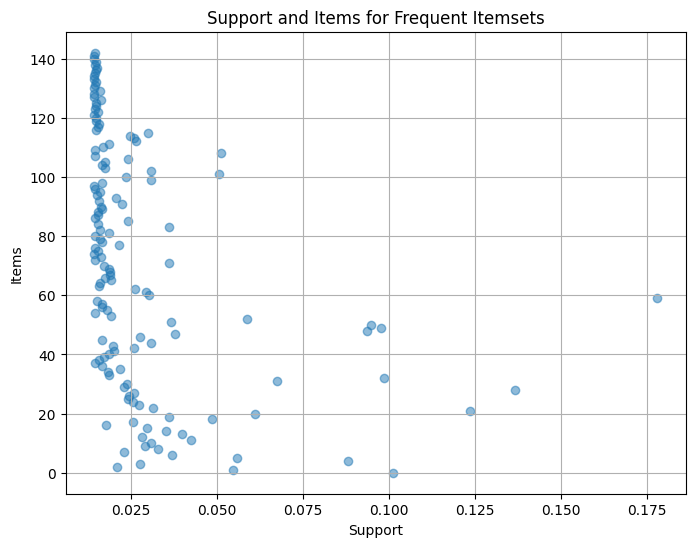

In [13]:
# Plotting the graph 
frequent_itemsets['Index'] = frequent_itemsets.reset_index().index
support = frequent_itemsets['support']
# Change the name of the product to auto increment index to display it easier
items = frequent_itemsets['Index']
print(frequent_itemsets)

plt.figure(figsize=(8, 6))
plt.scatter(support,items, alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Items')
plt.title('Support and Items for Frequent Itemsets')
plt.grid(True)
plt.show()